In [2]:
# Importer les librairies et les données 

import pandas as pd
import matplotlib.pyplot as plt
import math
import spacy
from collections import Counter


nlp = spacy.load("fr_core_news_sm")


In [ ]:
data = pd.read_csv("../data/NEW1.csv")
colonnes = data[["num", "title", "id", "date", "code", "mod_title", "body", "type", "lemma"]]

print(data)

# Représentation des données

In [5]:
# Concaténation des mots (sans stopword, ponctuations, espace...)
concat_article_stop = []
for i, element in enumerate(data.itertuples()):
    #print(element)
    doc = nlp(element.body)
    data.loc[i, 'taille'] = len(doc)
    doc = [token.text for token in doc if (not token.is_punct) and (not token.is_space) and (not token.like_url) and (not token.is_stop)]
    for token in doc:
        concat_article_stop.append(str(token))

print(data['taille'])
concat_counter_stop = Counter(concat_article_stop)
print(concat_counter_stop)

0         50.0
1        172.0
2         78.0
3         78.0
4         77.0
         ...  
3608     413.0
3609     295.0
3610    2285.0
3611    1630.0
3612    3391.0
Name: taille, Length: 3613, dtype: float64


In [6]:
print(concat_counter_stop)

Counter({'article': 7381, '°': 6716, 'L.': 5546, '1': 4356, '2': 2901, 'personnes': 2696, 'sociale': 2450, 'conseil': 2116, 'R.': 2115, '3': 2103, 'code': 2039, 'établissement': 1839, 'service': 1686, 'cas': 1676, 'conditions': 1655, 'président': 1534, '4': 1521, 'mots': 1467, 'départemental': 1448, 'services': 1398, 'aide': 1363, 'établissements': 1276, 'alinéa': 1216, 'application': 1187, '5': 1179, 'titre': 1157, 'Etat': 1148, 'accueil': 1144, 'mentionnés': 1136, 'présent': 1078, 'santé': 1069, 'représentant': 1050, 'dispositions': 1016, 'prévues': 981, '6': 959, 'département': 956, 'demande': 953, 'D.': 951, 'modalités': 950, 'articles': 927, 'mentionné': 897, 'sécurité': 884, 'protection': 873, 'autonomie': 864, 'enfant': 842, 'charge': 830, 'directeur': 820, 'travail': 818, '312': 816, 'mentionnée': 816, 'mentionnées': 796, 'prestations': 784, 'compte': 782, 'handicapées': 771, 'montant': 755, 'accompagnement': 753, '314': 735, 'vie': 727, 'membres': 711, 'activité': 710, 'format

In [8]:
# Concaténation des mots (sans ponctuations, espace, URL mais avec stopword)
concat_article = []
for i, element in enumerate(data.itertuples()):
    #print(element)
    doc = nlp(element.body)
    data.loc[i, 'taille'] = len(doc)
    doc = [token.text for token in doc if (not token.is_punct) and (not token.is_space) and (not token.like_url)]
    for token in doc:
        concat_article.append(str(token))

print(data['taille'])
concat_counter = Counter(concat_article)
print(concat_counter)

0         50.0
1        172.0
2         78.0
3         78.0
4         77.0
         ...  
3608     413.0
3609     295.0
3610    2285.0
3611    1630.0
3612    3391.0
Name: taille, Length: 3613, dtype: float64
Counter({'de': 39918, "l'": 23579, 'la': 17590, 'et': 15806, 'à': 15677, 'des': 15126, 'du': 14258, "d'": 13795, 'les': 11514, 'le': 10521, 'ou': 8586, 'par': 7560, 'article': 7381, 'en': 7154, 'au': 6981, '°': 6716, 'un': 5598, 'est': 5582, 'L.': 5546, 'dans': 4974, '1': 4356, 'une': 4163, 'aux': 3849, 'sont': 3523, 'pour': 3522, '2': 2901, 'Les': 2808, 'personnes': 2696, 'Le': 2626, 'sociale': 2450, 'personne': 2366, 'qui': 2237, 'conseil': 2116, 'R.': 2115, '3': 2103, 'que': 2050, 'code': 2039, 'établissement': 1839, 'sur': 1836, 'son': 1791, 'service': 1686, 'cas': 1676, 'conditions': 1655, 'peut': 1608, 'La': 1594, 'être': 1540, 'président': 1534, "L'": 1529, '4': 1521, 'mots': 1467, 'départemental': 1448, 'a': 1412, 'services': 1398, 'pas': 1389, 'il': 1365, 'aide': 1363, 'ne

0       119
1        17
2        52
3        33
4        22
       ... 
2878     57
2879     57
2880     57
2881     57
2882     57
Name: taille, Length: 2883, dtype: int64


<Axes: ylabel='Frequency'>

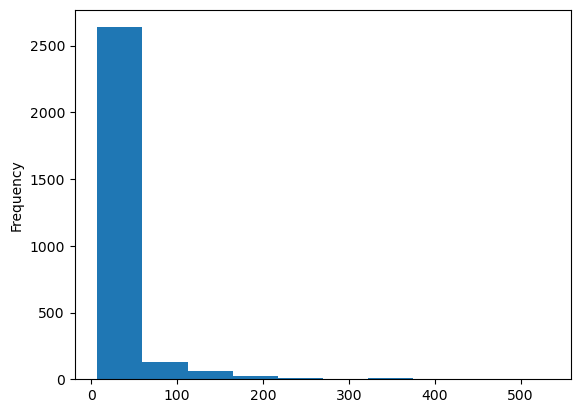

In [46]:
# Plot du nombre d'article selon leur longueur
print(data['taille'])
data['taille'].plot(kind="hist")

In [9]:
# Plot du nombre d'article selon leur taille 
bar_width = 1

plt.bar(data['taille'], color=['skyblue'], width=bar_width, edgecolor='black')
plt.xlabel('Taille des articles', fontweight='bold', fontsize=15)
plt.ylabel('Nombre darticles', fontweight='bold', fontsize=15)
plt.title('Nombre d`article des différents codes de la loi française')
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [20]:
# Type d'article: L R A (autres chiffres) 
list_types = data["type"].drop_duplicates().to_list()
print(f"Liste des types d'article : {list_types}")

# d = data.query("`type` == 'D'")
# #print(d['title'])
# a = data.query("`type` == 'A'")
# print(a['title'])

# Tuple contenant le nombre d'article associé à son code 
lst_type_nbr = [(type,len(data.query("`type` == @type"))) for type in list_types]
print(f"Liste de tuples des codes et du nombre d'article : {lst_type_nbr}")

Liste des types d'article : ['L', 'R', 'D', 'A']
Liste de tuples des codes et du nombre d'article : [('L', 1015), ('R', 1557), ('D', 1000), ('A', 41)]


[1015, 1557, 1000, 41]


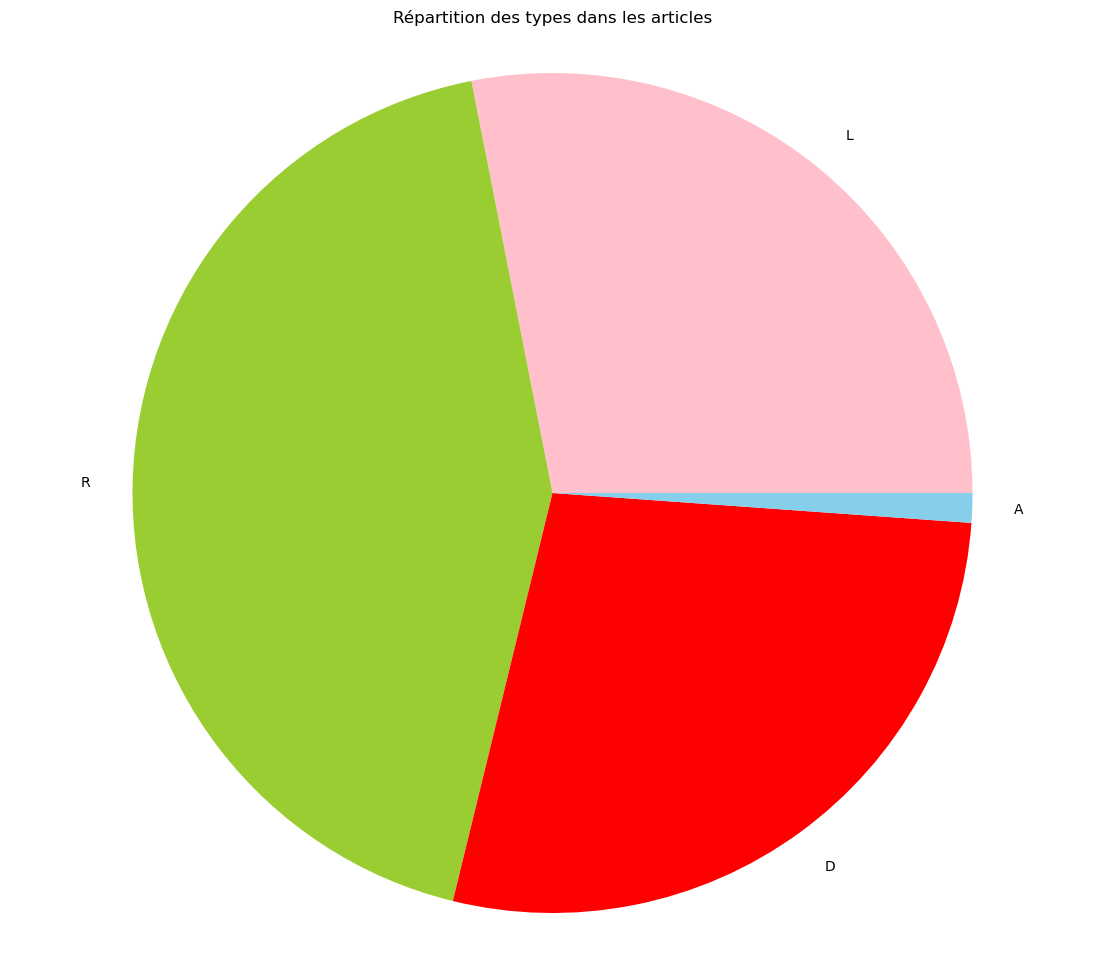

In [24]:
# Camembert de la distribution des types dans le corpus

nom = ["L", "R", "D", "A"]
taille = [type[1] for type in lst_type_nbr]
print(taille)

plt.figure(figsize=(14, 12))  
plt.pie(taille, labels=nom, colors=["pink", "yellowgreen", "red", "skyblue"])
plt.title(f"Répartition des types dans les articles")
plt.axis('equal')
plt.show()

# Loi de Zipf 

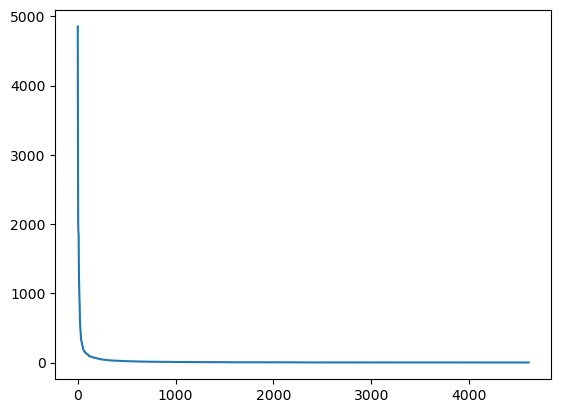

In [21]:
## LOI DE ZIPF avec les textes de lois 

from collections import Counter
from datasets import load_dataset

concat_article = []
for i, element in enumerate(data.itertuples()):
    #print(element)
    doc = nlp(element.body)
    #print(doc)
    for token in doc:
        concat_article.append(str(token))
    if i>500:
        break

concat_counter = Counter(concat_article)
plt.plot(sorted(concat_counter.values(), reverse=True))

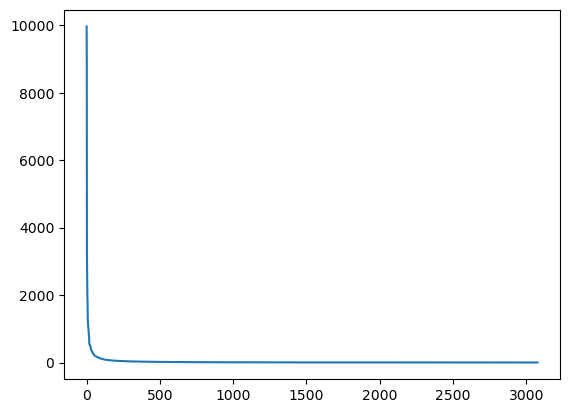

In [24]:
## LOI DE ZIPF avec les textes de lois lemmatisés 

from collections import Counter
from datasets import load_dataset

concat_article = []
for i, element in enumerate(data.itertuples()):
    #print(element)
    doc = nlp(element.lemma)
    #print(doc)
    for token in doc:
        concat_article.append(str(token))
    if i>500:
        break

concat_counter = Counter(concat_article)
plt.plot(sorted(concat_counter.values(), reverse=True))

In [4]:
freq = pd.read_csv('../data/freq_mots_code_social.csv')
print(freq)

                                       code            mot  freq
0  Code de l'action sociale et des familles        article  7381
1  Code de l'action sociale et des familles      personnes  2696
2  Code de l'action sociale et des familles        sociale  2450
3  Code de l'action sociale et des familles        conseil  2116
4  Code de l'action sociale et des familles           code  2039
5  Code de l'action sociale et des familles  établissement  1839
6  Code de l'action sociale et des familles        service  1686
7  Code de l'action sociale et des familles            cas  1676
8  Code de l'action sociale et des familles     conditions  1655
9  Code de l'action sociale et des familles      président  1534
